<a href="https://colab.research.google.com/github/Srijan-Rai/CardioVascularRiskPrediction/blob/main/Cardiovascular_Risk_Prediction(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Risk Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. 

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style = "darkgrid")
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mounting the drive to obtain the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
path = "/content/drive/My Drive/Colab Notebooks/Cardiovascular Risk Prediction(Classification Project)/data_cardiovascular_risk.csv"
df= pd.read_csv(path)

In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Dataset Columns**

The dataset consists of the following columns:

Demographic:
*   **Sex**: male or female("M" or "F")
*   **Age**: Age of the patient

Behavioral:
*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
*   **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day

Medical( history):
*   **BP Meds**: whether or not the patient was on blood pressure medication
*   **Prevalent Stroke**: whether or not the patient had previously had a stroke
*   **Prevalent Hyp**: whether or not the patient was hypertensive
*   **Diabetes**: whether or not the patient had diabetes

Medical(current):
*   **Tot Chol**: total cholesterol level
*   **Sys BP**: systolic blood pressure
*   **Dia BP**: diastolic blood pressure
*   **BMI**: Body Mass Index
*   **Heart Rate**: heart rate
*   **Glucose**: glucose level

Predict variable:
*   **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”)

















## Exploratory Data Analysis

### Head and Tail

In [ ]:
# Head of the data frame
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Tail of the data frame
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Statistical Info

In [ ]:
# Basic information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

From the above information, we can say,
1.   Except sex and is_smoking, all the features contain numeric values.
2.   There are total 3390 entries and 17 features including the target feature i.e the TenYearCHD.
3. Some of the features contains NAN or missing values which needs to be handled.



In [ ]:
# Get statistical data for the numeric features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


* The above statistical data provides us with the mean, minimum value, maximum value, and also the data distribution for the features that contain numeric values.
* By looking into the data we can say that some of the features like, "cigsperDay", "totChol", "glucose" etc., may contain some outliers that should be handled accordingly.


### Remove Duplicate rows

In [ ]:
# Total duplicate rows in the dataframe
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(keep ="first", inplace = True)

There are no duplicates in the dataframe

### Handling Null/NAN Values

In [ ]:
#check for NAN/Null values
Percentage_null_value = (df.isna().sum()/df.isna().count()*100).sort_values(ascending= False).reset_index()
Percentage_null_value.columns = ["Features","Percentage Null Values"]
Percentage_null_value

,Features,Percentage Null Values
0,glucose,8.967552
1,education,2.566372
2,BPMeds,1.297935
3,totChol,1.120944
4,cigsPerDay,0.648968
5,BMI,0.412979
6,heartRate,0.029499
7,id,0.000000
8,diaBP,0.000000
9,sysBP,0.000000


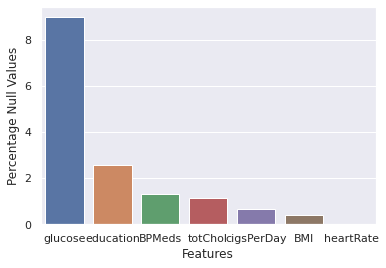

In [ ]:
# Plotting the percentage null values in different features
Percentage_null_value = Percentage_null_value[Percentage_null_value["Percentage Null Values"]>0]
sns.barplot(x= Percentage_null_value["Features"] , y= Percentage_null_value["Percentage Null Values"])

From the above data frame we can see the total number of nan values present in the dataframe. These entries must be dropped or imputed with necessary values.

Since gluce has the hoghest NAN values, we would impute the NAN values with its measure of central tendancy. 

And the rest of the features has very low number of NAN values. We would drop these values as it might not cause any significant affect on the data.

We would use KNN imputation to fill these NAN values with their appropriate values.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df["glucose"] = imputer.fit_transform(df["glucose"].values.reshape(-1,1))

In [ ]:
df.dropna(axis =0 , inplace = True)
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Handling Outliers

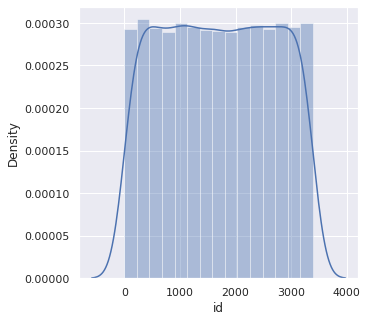

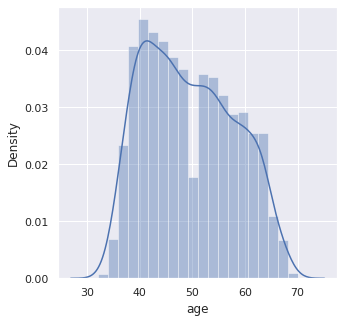

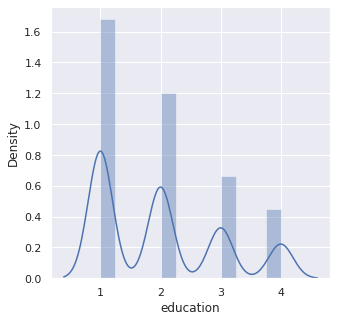

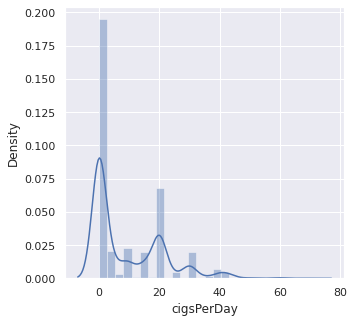

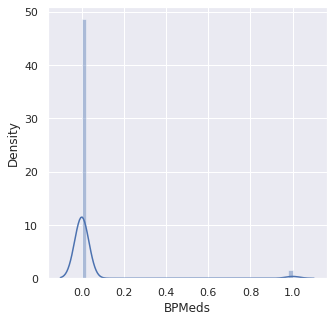

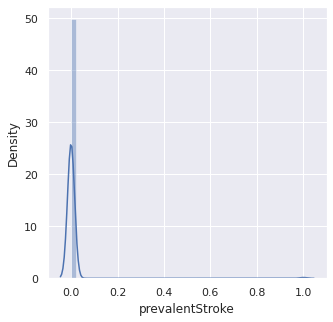

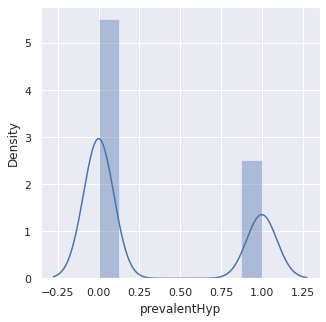

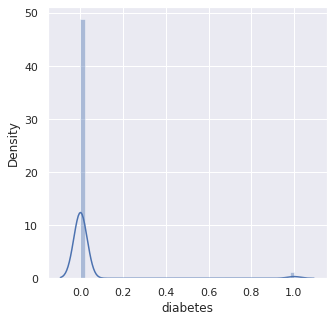

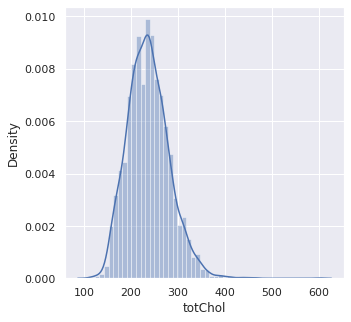

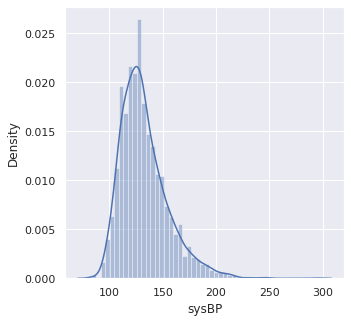

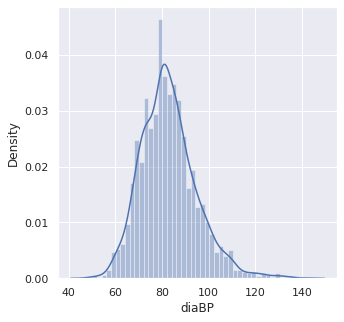

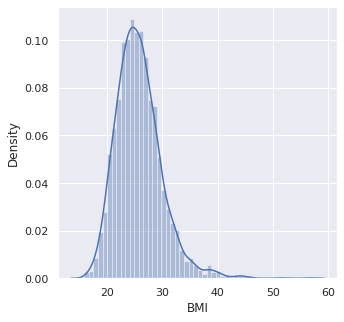

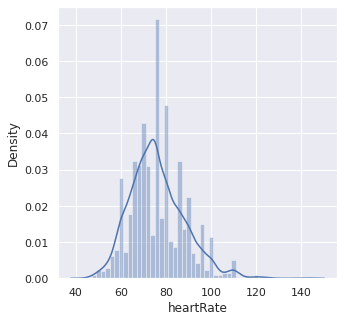

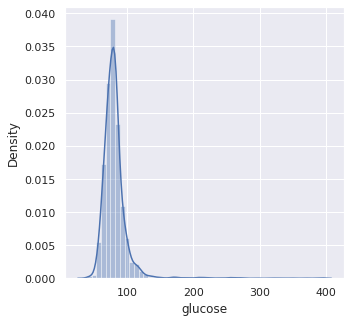

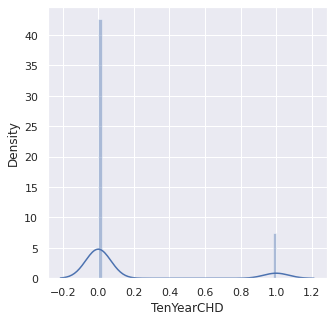

In [ ]:
# Distribution plots for different features
for column in df.describe().columns:
  plt.figure(figsize=(5,5))
  sns.distplot(df[column])

From the above distribution plots, we can see that there are some outliers present in some features. Let us visualize these features through box plots to gain some more insights into the outliers.

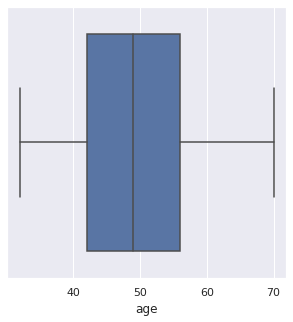

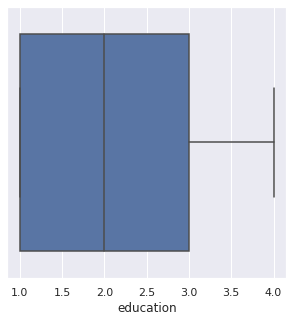

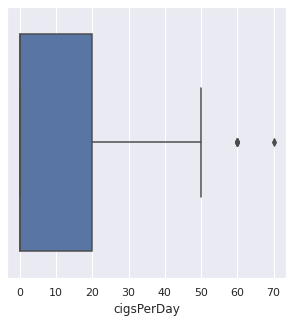

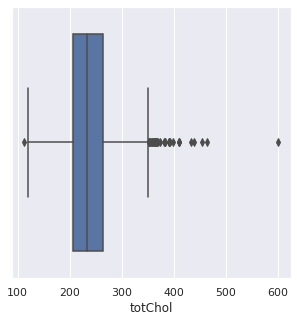

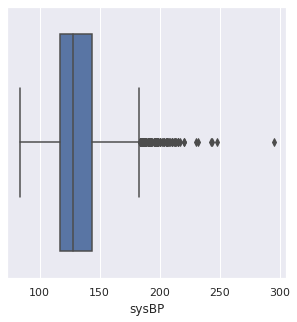

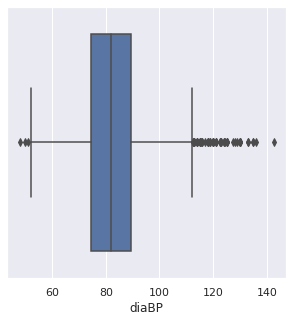

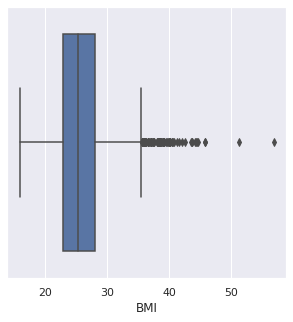

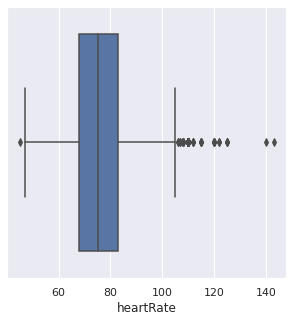

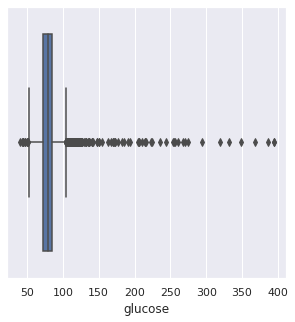

In [ ]:
# outlier detection
# Use necessary features for outlier detection
outlier_features = df[["age","education","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
for column in outlier_features:
  plt.figure(figsize=(5,5))
  sns.boxplot(outlier_features[column])

From the above boxplots let us drop all the data which is differs significantly from the other values.

In [ ]:
outliers = {"cigsPerDay":50, "totChol":500, "sysBP":250, "diaBP":140, "BMI":50, "heartRate":140}
for feature, outlier_value in outliers.items():
  df = df[df[feature]<outlier_value]

### Data Visualization

0    2700
1     469
Name: TenYearCHD, dtype: int64


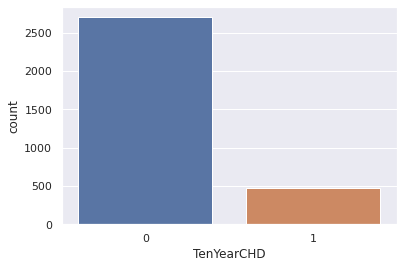

In [ ]:
# Cases count
sns.countplot(x='TenYearCHD',data=df)
print(df["TenYearCHD"].value_counts())

As from the above barplot, we can see a huge data imbalance between the two classes of TenYearCHD.

This imbalance of data needs to be handled, otherwise the model we build for this data will perform better only on the class with maximum count, which is not the desired outcome.

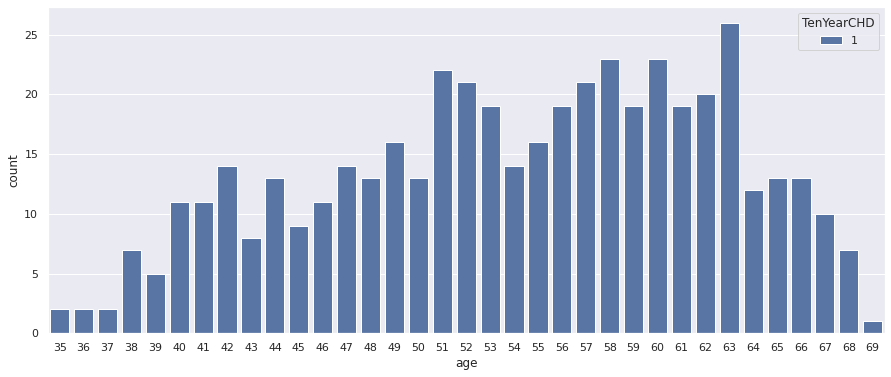

In [ ]:
#Number of positive cases with respect to age
positive_cases = df[df['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD')

The people with the highest risk of developing CHD are between the ages of 51 and 63

Text(0.5, 1.0, 'People haing diabetes or Not ')

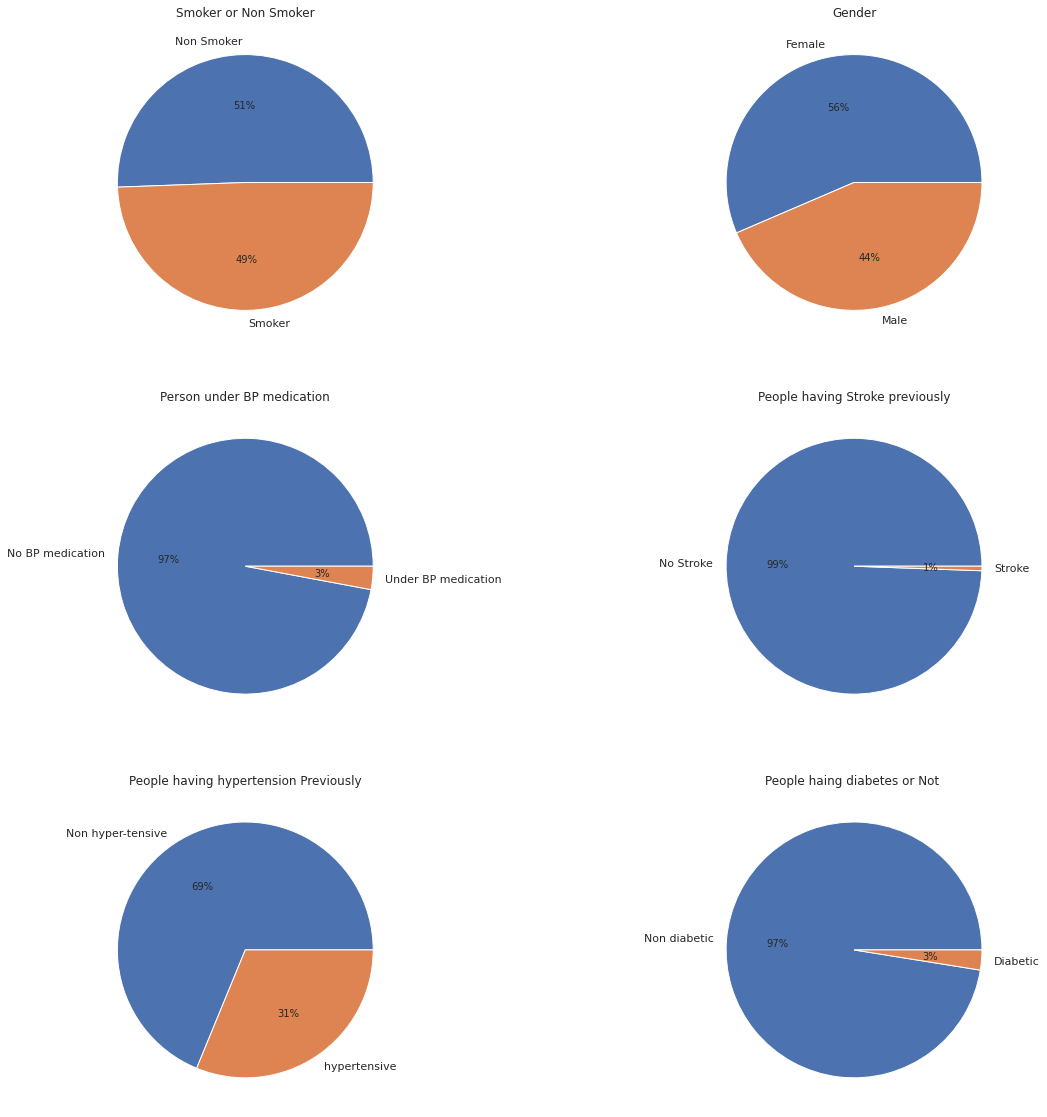

In [ ]:
# Countplots of categorical features
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
labels = 'Non Smoker','Smoker'
plt.pie(df['is_smoking'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Smoker or Non Smoker")

plt.subplot(3,2,2)
labels = 'Female','Male'
plt.pie(df['sex'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Gender")

plt.subplot(3,2,3)
labels = 'No BP medication',"Under BP medication"
plt.pie(df['BPMeds'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Person under BP medication")

plt.subplot(3,2,4)
labels = 'No Stroke','Stroke'
plt.pie(df['prevalentStroke'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("People having Stroke previously")

plt.subplot(3,2,5)
labels = 'Non hyper-tensive','hypertensive'
plt.pie(df['prevalentHyp'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("People having hypertension Previously")

plt.subplot(3,2,6)
labels = 'Non diabetic','Diabetic'
plt.pie(df['diabetes'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("People haing diabetes or Not ")


Observations from the above pie plots:

* There are an equal number of smokers and non-smokers in the dataframe 
* The number of females is higher than the number of males in the dataframe.
* A very small number of people on blood pressure medication are represented in the data.
* Only 1% of those in the data had previously smoked.
* The majority of the people in the data are non-hypertensive.
* and the majority of the people in the data are non-diabetic.s



<Figure size 720x720 with 0 Axes>

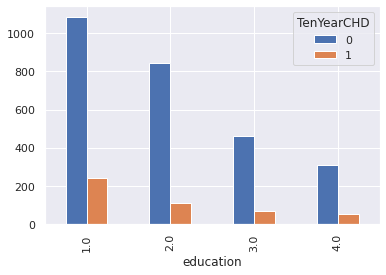

<Figure size 720x720 with 0 Axes>

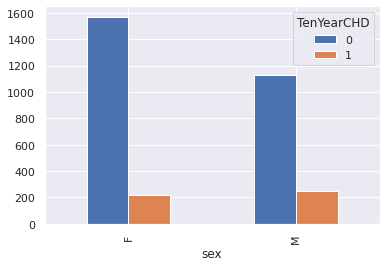

<Figure size 720x720 with 0 Axes>

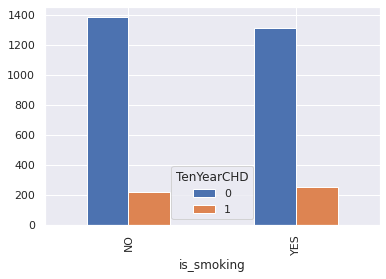

<Figure size 720x720 with 0 Axes>

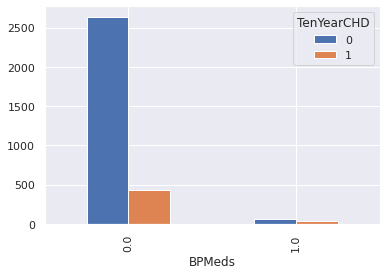

<Figure size 720x720 with 0 Axes>

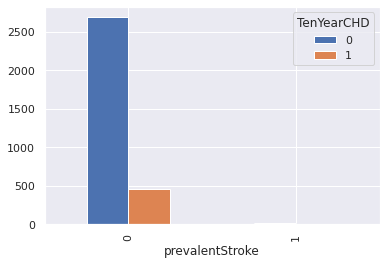

<Figure size 720x720 with 0 Axes>

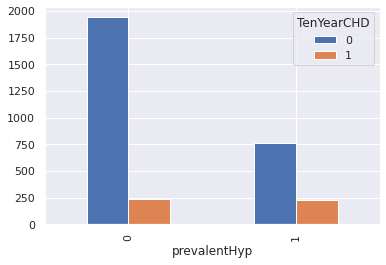

<Figure size 720x720 with 0 Axes>

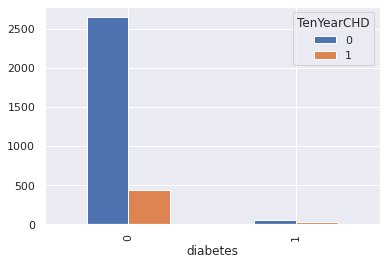

In [ ]:
# Ten Year CHD count on different categorical variables
categorical_features = ["education","sex","is_smoking","BPMeds","prevalentStroke","prevalentHyp","diabetes"]
for feature in categorical_features:
  plt.figure(figsize=(10,10))
  counts = df.groupby(feature)["TenYearCHD"].value_counts().unstack()
  counts.plot(kind = "bar")

Observtions from the above plots:
* The number of data decreases as the education class increases.
* More Males are prone to cardio vascular risk than females.
* Smoking increases the cardiovascular disease risk.
* The data contains more number of people who donot have any BP medications. However the people with BP medications are more prone to th cardio vascular risk.
* Hypertensive people are more proned to cardiovascular risks.
* The are more number of non diabetic people in the data frame. However the diabetic people are having higher cardiovascular risk.

### Feature Engineering

As we know that there are some categorical string variables in the data that needs to be converted into numerical variable that can be passed into th ML modelsfor further analysis.

#### One-Hot Encoding

Let us conduct one-hot encoding on the gender feature which will hence produce two new fetaures with the values based on the gender value.

In [ ]:
# getdummies method to perform the one-hot encoding
df = pd.get_dummies(data = df, columns= ["sex"])

#### Label Encoding

The is_smoking feature can undergo label encoding with "No" as 0 as"Yes" as 1.

In [ ]:
# Label encoing using catcodes 
df["is_smoking"] = df["is_smoking"].astype("category")
df["is_smoking"] = df["is_smoking"].cat.codes

In [ ]:
# Dataframe after encoding
df

,id,age,education,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
1,1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1
2,2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0
3,3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,4,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0
5,5,61,3.0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0,1,0
3385,3385,60,1.0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0
3386,3386,46,1.0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0
3387,3387,44,3.0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1
